In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Load the dataset

In [37]:
# 1.Load the dataset
variable=pd.read_csv('churn_modelling.csv')

In [38]:
variable.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
variable.shape

(10000, 14)

In [41]:
variable.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## 2.1 Univariate Analysis

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

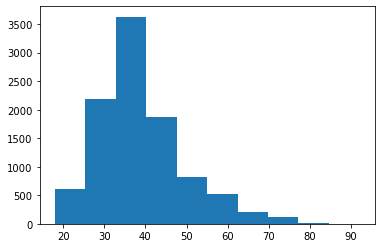

In [42]:
# 2.1 Univariate Analysis
y=variable['Age']
plt.hist(y)

## 2.2 Bi - Variate Analysis

<BarContainer object of 10000 artists>

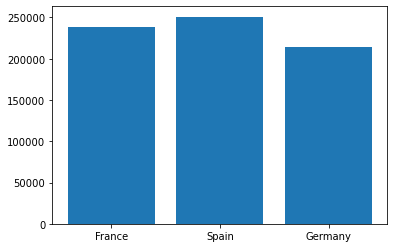

In [43]:
# 2.2 Bi - Variate Analysis
x=variable['Geography']
y=variable['Balance']
plt.bar(x,y)

## 3.Perform descriptive statistics on the dataset

In [44]:
# 3.Perform descriptive statistics on the dataset
variable.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 4.Find the outliers and replace the outliers

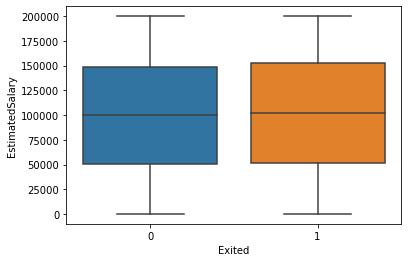

In [45]:
# 4.Find the outliers and replace the outliers
estimatedSalary = sns.boxplot(y="EstimatedSalary",x="Exited",data=variable)


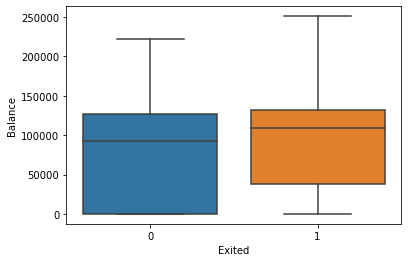

In [46]:
balance = sns.boxplot(y="Balance",x="Exited",data=variable)

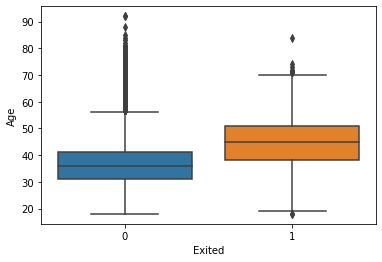

In [47]:
age = sns.boxplot(y="Age",x="Exited",data=variable)

## 5.Handle the Missing values

In [48]:
# 5.Handle the Missing values
variable.isnull().sum()
# No missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 6.Check for Categorical columns and perform encoding.

In [49]:
# 6.Check for Categorical columns and perform encoding.
variable['Geography']=variable['Geography'].map({'France':0,'Spain':1,'Germany':2})
variable['Gender']=variable['Gender'].map({'Male':0,'Female':1})
variable

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,2,0,42,3,75075.31,2,1,0,92888.52,1


## drop unwanted features

In [50]:
# drop unwanted features
variable.drop(columns=['Surname','RowNumber','CustomerId'],inplace=True)
variable

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


## 7.Split the data into dependent and independent variables.

In [51]:
# 7.Split the data into dependent and independent variables.
X=variable.drop('Exited',axis=1)
Y=variable['Exited']

## 8.Split the data into training and testing

In [52]:
# 8.Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=12,stratify=Y)

In [53]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7500, 10), (2500, 10), (7500,), (2500,))

## 9.Scale the independent variables

In [54]:
# 9.Scale the independent variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_train

array([[ 0.36713992,  0.3028556 , -0.91604412, ..., -1.55863892,
         0.96797907,  1.63698432],
       [ 1.02161162,  0.3028556 , -0.91604412, ..., -1.55863892,
        -1.03308019,  0.01230388],
       [ 1.31248793,  0.3028556 ,  1.09165048, ...,  0.64158542,
         0.96797907, -1.43997773],
       ...,
       [ 1.34365325,  1.50785136, -0.91604412, ...,  0.64158542,
        -1.03308019,  1.64296744],
       [ 2.07084403,  0.3028556 , -0.91604412, ...,  0.64158542,
        -1.03308019,  1.19552853],
       [ 0.56452028,  1.50785136,  1.09165048, ..., -1.55863892,
        -1.03308019, -0.41313788]])